In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('dataset.csv')
df.columns = [i for i in range(df.shape[1])]
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.376373,0.222202,0.999937,0.383209,0.209819,0.999906,0.387305,0.210114,0.999824,0.391624,...,0.307991,0.851582,0.854747,0.472568,0.858515,0.931954,0.285559,0.886324,0.961942,M
1,0.557776,0.332777,0.999955,0.564677,0.313917,0.999918,0.569531,0.312254,0.999864,0.574295,...,0.511749,0.928742,0.987625,0.688477,0.980495,0.930902,0.434808,0.963554,0.983031,M
2,0.550815,0.156974,0.999781,0.559798,0.137913,0.999546,0.565403,0.136769,0.999457,0.570457,...,0.528300,0.871332,0.831359,0.537831,0.983566,0.979205,0.487028,0.929144,0.927606,M
3,0.530410,0.142974,0.999946,0.538674,0.127387,0.999924,0.543294,0.127026,0.999889,0.548412,...,0.496850,0.776815,0.944529,0.610852,0.820721,0.986124,0.454963,0.810655,0.988152,M
4,0.567110,0.246317,0.999913,0.573972,0.232067,0.999848,0.578695,0.231659,0.999774,0.583065,...,0.517818,0.838017,0.967895,0.672909,0.875180,0.983880,0.469388,0.861588,0.988444,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.736535,0.211421,0.999906,0.743266,0.197117,0.999867,0.747037,0.197719,0.999741,0.751122,...,0.620315,0.812979,0.963359,0.813060,0.864811,0.971918,0.571617,0.843890,0.988093,A
328,0.469985,0.199257,0.999767,0.476180,0.185875,0.999658,0.480576,0.186209,0.999496,0.485109,...,0.461599,0.811795,0.902503,0.509534,0.852837,0.983740,0.439245,0.842870,0.982346,A
329,0.551113,0.161392,0.999750,0.558406,0.148468,0.999641,0.562566,0.148460,0.999476,0.567411,...,0.528591,0.774905,0.868294,0.591766,0.816585,0.966759,0.504622,0.808621,0.964677,A
330,0.551681,0.238662,0.999921,0.558596,0.223348,0.999894,0.563039,0.223132,0.999846,0.567072,...,0.532517,0.812487,0.884043,0.597428,0.845302,0.948144,0.502381,0.839848,0.966754,A


In [4]:
df = df.rename(columns={99: 'Output'})
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,Output
0,0.376373,0.222202,0.999937,0.383209,0.209819,0.999906,0.387305,0.210114,0.999824,0.391624,...,0.307991,0.851582,0.854747,0.472568,0.858515,0.931954,0.285559,0.886324,0.961942,M
1,0.557776,0.332777,0.999955,0.564677,0.313917,0.999918,0.569531,0.312254,0.999864,0.574295,...,0.511749,0.928742,0.987625,0.688477,0.980495,0.930902,0.434808,0.963554,0.983031,M
2,0.550815,0.156974,0.999781,0.559798,0.137913,0.999546,0.565403,0.136769,0.999457,0.570457,...,0.528300,0.871332,0.831359,0.537831,0.983566,0.979205,0.487028,0.929144,0.927606,M
3,0.530410,0.142974,0.999946,0.538674,0.127387,0.999924,0.543294,0.127026,0.999889,0.548412,...,0.496850,0.776815,0.944529,0.610852,0.820721,0.986124,0.454963,0.810655,0.988152,M
4,0.567110,0.246317,0.999913,0.573972,0.232067,0.999848,0.578695,0.231659,0.999774,0.583065,...,0.517818,0.838017,0.967895,0.672909,0.875180,0.983880,0.469388,0.861588,0.988444,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,0.736535,0.211421,0.999906,0.743266,0.197117,0.999867,0.747037,0.197719,0.999741,0.751122,...,0.620315,0.812979,0.963359,0.813060,0.864811,0.971918,0.571617,0.843890,0.988093,A
328,0.469985,0.199257,0.999767,0.476180,0.185875,0.999658,0.480576,0.186209,0.999496,0.485109,...,0.461599,0.811795,0.902503,0.509534,0.852837,0.983740,0.439245,0.842870,0.982346,A
329,0.551113,0.161392,0.999750,0.558406,0.148468,0.999641,0.562566,0.148460,0.999476,0.567411,...,0.528591,0.774905,0.868294,0.591766,0.816585,0.966759,0.504622,0.808621,0.964677,A
330,0.551681,0.238662,0.999921,0.558596,0.223348,0.999894,0.563039,0.223132,0.999846,0.567072,...,0.532517,0.812487,0.884043,0.597428,0.845302,0.948144,0.502381,0.839848,0.966754,A


In [5]:
X = df.iloc[:, :-1]
print("Features shape =", X.shape)

Y = df.iloc[:, -1]
print("Labels shape =", Y.shape)

Features shape = (332, 99)
Labels shape = (332,)


In [6]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
svm = SVC(C=10, gamma=0.1, kernel='rbf')
svm.fit(x_train, y_train)

SVC(C=10, gamma=0.1)

In [7]:
y_pred = svm.predict(x_test)
y_pred

array(['wandering', 'wandering', 'wandering', 'C', 'Y', 'M', 'wandering',
       'wandering', 'C', 'wandering', 'Y', 'Y', 'A', 'wandering', 'Y',
       'C', 'wandering', 'A', 'wandering', 'Y', 'C', 'Y', 'Y', 'Y', 'A',
       'C', 'M', 'A', 'C', 'A', 'C', 'wandering', 'wandering', 'C', 'C',
       'Y', 'wandering', 'wandering', 'Y', 'Y', 'wandering', 'M', 'M',
       'wandering', 'wandering', 'M', 'C', 'wandering', 'C', 'M',
       'wandering', 'A', 'A', 'A', 'M', 'wandering', 'C', 'Y', 'Y',
       'wandering', 'M', 'A', 'wandering', 'A', 'wandering', 'A', 'C'],
      dtype=object)

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
precision = precision_score(y_test, y_pred, average='micro')
f1, recall, precision

(1.0, 1.0, 1.0)

<AxesSubplot:title={'center':'Confusion Matrix - Pose Gesture Recognition'}>

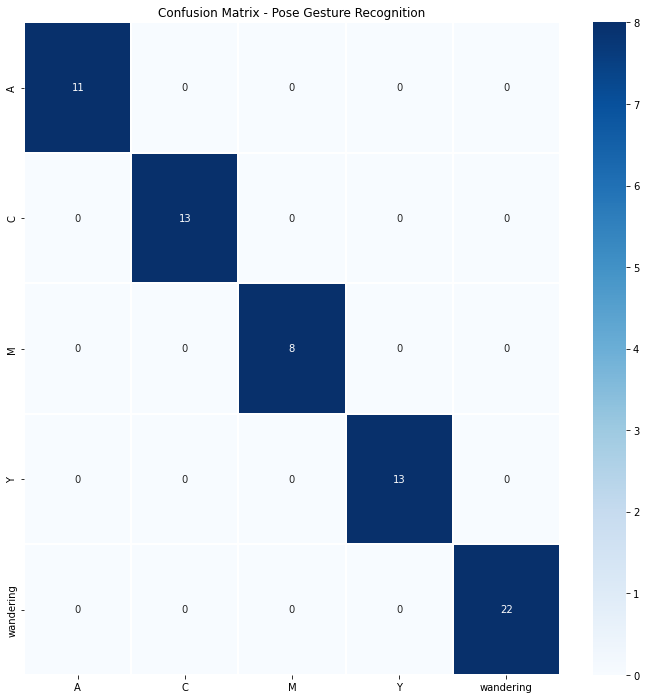

In [11]:
labels = sorted(list(set(df['Output'])))
labels = [str(x) for x in labels]

fig, ax = plt.subplots(figsize=(12, 12))

ax.set_title("Confusion Matrix - Pose Gesture Recognition")

maping = sns.heatmap(cf_matrix, 
                     annot=True,
                     cmap = plt.cm.Blues, 
                     linewidths=.2,
                     xticklabels=labels,
                     yticklabels=labels, vmax=8,
                     fmt='g',
                     ax=ax
                    )
maping

In [41]:
import pickle

# save model
with open('model.pkl','wb') as f:
    pickle.dump(svm,f)